In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

<ErrorbarContainer object of 3 artists>

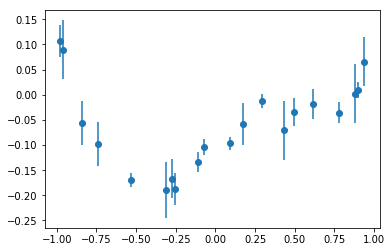

In [14]:
data = np.loadtxt("fitting.txt", skiprows = 1)
x = data[:,0]
y = data[:,1]
sigma_y = data[:,2]
plt.errorbar(x, y, yerr=sigma_y, fmt='o')

In [40]:
def lk(modelo):
    d = y - modelo
    d = d/sigma_y
    d = -0.5 * np.sum(d**2) + np.sum(np.log(1/(2*np.pi*sigma_y*sigma_y)**0.5))
    return np.exp(d)

In [44]:
N = 100000
params = 7
pmds = np.ones(params)

for numparams in range(1,params+1):
    lks = np.ones(N)
    for intentos in range(N):        
        p = np.poly1d(np.random.uniform(-1,1,numparams))
        lks[intentos] = lk(p(x))
    pmds[numparams-1] = np.sum(lks)/N    

Text(0,0.5,'(P(M|D))')

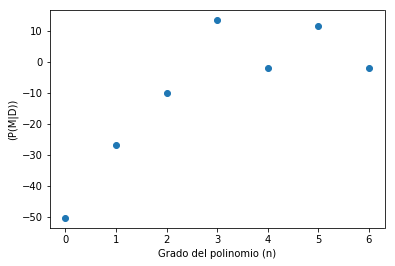

In [45]:
n = np.array([x for x in range(params)] )
plt.scatter(n,np.log(pmds))
plt.xlabel("Grado del polinomio (n)")
plt.ylabel("(P(M|D))")

In [ ]:
plt.savefig("pmd.pdf")
plt.close()

In [36]:
pmds

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 4.44458393e-07])